<a href="https://colab.research.google.com/github/nanda1296/Predictive-Analytics-for-Real-Estate/blob/Different_models/Project_Group_A13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#checking the data types of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Land Use                           56636 non-null  object        
 1   Property Address                   56477 non-null  object        
 2   Suite/ RESIDENTIAL CONDO#          6109 non-null   object        
 3   Sale Date                          56636 non-null  datetime64[ns]
 4   Sale Price                         56636 non-null  int64         
 5   Legal Reference                    56636 non-null  object        
 6   Sold As Vacant                     56636 non-null  object        
 7   Multiple Parcels Involved in Sale  56636 non-null  object        
 8   Owner Name                         25261 non-null  object        
 9   Address                            26017 non-null  object        
 10  Acreage                           

In [7]:
#Checking for null values of each feature
df.isnull().sum().sort_values(ascending=False)

Suite/ RESIDENTIAL CONDO#            50527
Half Bath                            32490
Bedrooms                             32477
Foundation Type                      32472
Grade                                32471
Exterior Wall                        32471
Year Built                           32471
Finished Area                        32470
Full Bath                            32359
Owner Name                           31375
Land Value                           30619
Total Value                          30619
Building Value                       30619
Neighborhood                         30619
Tax District                         30619
Acreage                              30619
Address                              30619
Property Address                       159
Multiple Parcels Involved in Sale        0
Sold As Vacant                           0
Legal Reference                          0
Sale Price                               0
Sale Date                                0
Land Use   

In [8]:
#Checking for unique rows in each feature
df.nunique().sort_values(ascending=False)

Legal Reference                      52898
Property Address                     45068
Address                              22327
Owner Name                           19713
Sale Price                            8085
Finished Area                         6117
Total Value                           5848
Building Value                        4406
Suite/ RESIDENTIAL CONDO#             1475
Land Value                            1122
Sale Date                             1117
Acreage                                519
Neighborhood                           203
Year Built                             126
Land Use                                35
Grade                                   20
Bedrooms                                12
Full Bath                               11
Exterior Wall                           10
Tax District                             7
Foundation Type                          6
Half Bath                                4
Multiple Parcels Involved in Sale        2
Sold As Vac

In [9]:
df.describe()

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,5.663600e+04,26017.000000,26017.000000,2.601700e+04,2.601700e+04,2.601700e+04,24166.000000,24165.000000,24159.000000,24277.000000,24146.000000
mean,3.272111e+05,0.498903,4356.215782,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.749224,3.090029,1.886106,0.283981
std,9.287425e+05,1.570396,2170.348270,1.060405e+05,2.068041e+05,2.810703e+05,1687.017313,26.546141,0.852942,0.961572,0.487905
min,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,0.180000,3126.000000,2.100000e+04,7.590000e+04,1.028000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,2.054500e+05,0.270000,3929.000000,2.880000e+04,1.114000e+05,1.485000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,3.290000e+05,0.450000,6228.000000,6.000000e+04,1.807000e+05,2.685000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


#Data Exploration

<ipython-input-10-71efaa35b498>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Reds")


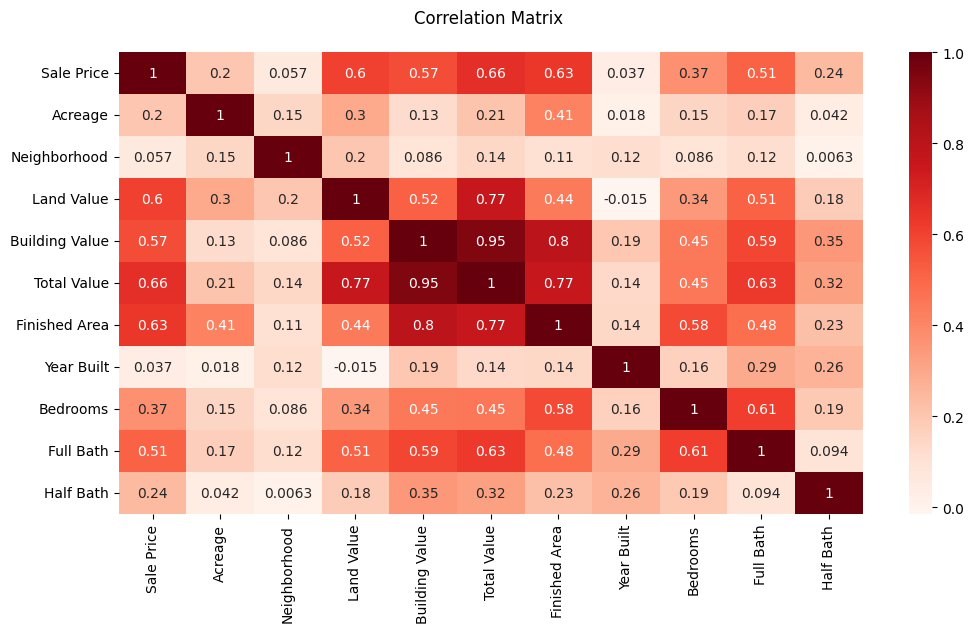

In [10]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.title('Correlation Matrix \n'.center(10))
plt.show()

In [15]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Spring 2023 - AISC - Nest Analytics_Toronto_housing_data_.xlsx')
df = df.drop(df.columns[0],axis=1)
df.head()

,Land Use,Property Address,Suite/ RESIDENTIAL CONDO#,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,1208 3RD AVE S,8,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,1802 STEWART PL,NaN,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,224 PEACHTREE ST,NaN,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,316 LUTIE ST,NaN,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [16]:
df.shape

(56636, 24)

In [17]:
df = df.drop(['Property Address','Suite/ RESIDENTIAL CONDO#','Legal Reference','Sale Date','Owner Name','Address'], axis=1)

In [18]:
col = list(df.columns)
categorical_features = []
numerical_features = []

for i in col:
        if df[i].dtype == 'object':
            categorical_features.append(i)
        else:
            numerical_features.append(i)

print('Categorical_Features: ', categorical_features)
print('Numerical_Features: ', numerical_features)

print('\nInference: The Dataset has {} categorical & {} numerical features.'.format(len(categorical_features),len(numerical_features)))

Categorical_Features:  ['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade']
Numerical_Features:  ['Sale Price', 'Acreage', 'Neighborhood', 'Land Value', 'Building Value', 'Total Value', 'Finished Area', 'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath']

Inference: The Dataset has 7 categorical & 11 numerical features.


In [1]:
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode())
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

NameError: ignored

In [20]:
df.shape

(56636, 18)

In [21]:
df = df.dropna(axis='rows')
df

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,132000,No,No,0.498903,URBAN SERVICES DISTRICT,4356.215782,69072.665027,160802.458969,232397.094246,1926.954345,CRAWL,1963.749224,BRICK,C,3.090029,1.886106,0.283981
1,SINGLE FAMILY,191500,No,No,0.170000,URBAN SERVICES DISTRICT,3127.000000,32000.000000,134400.000000,168300.000000,1149.000000,PT BSMT,1941.000000,BRICK,C,2.000000,1.000000,0.000000
2,SINGLE FAMILY,202000,No,No,0.110000,CITY OF BERRY HILL,9126.000000,34000.000000,157800.000000,191800.000000,2090.824950,SLAB,2000.000000,BRICK/FRAME,C,3.000000,2.000000,1.000000
3,SINGLE FAMILY,32000,No,No,0.170000,URBAN SERVICES DISTRICT,3130.000000,25000.000000,243700.000000,268700.000000,2145.600010,FULL BSMT,1948.000000,BRICK/FRAME,B,4.000000,2.000000,0.000000
4,SINGLE FAMILY,102000,No,No,0.340000,URBAN SERVICES DISTRICT,3130.000000,25000.000000,138100.000000,164800.000000,1969.000000,CRAWL,1910.000000,FRAME,C,2.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,RESIDENTIAL CONDO,210000,No,No,0.498903,URBAN SERVICES DISTRICT,4356.215782,69072.665027,160802.458969,232397.094246,1926.954345,CRAWL,1963.749224,BRICK,C,3.090029,1.886106,0.283981
56632,RESIDENTIAL CONDO,338000,No,No,0.498903,URBAN SERVICES DISTRICT,4356.215782,69072.665027,160802.458969,232397.094246,1926.954345,CRAWL,1963.749224,BRICK,C,3.090029,1.886106,0.283981
56633,RESIDENTIAL CONDO,742000,No,No,0.498903,URBAN SERVICES DISTRICT,4356.215782,69072.665027,160802.458969,232397.094246,1926.954345,CRAWL,1963.749224,BRICK,C,3.090029,1.886106,0.283981
56634,RESIDENTIAL CONDO,320000,No,No,0.498903,URBAN SERVICES DISTRICT,4356.215782,69072.665027,160802.458969,232397.094246,1926.954345,CRAWL,1963.749224,BRICK,C,3.090029,1.886106,0.283981


In [9]:

df.shape

(24165, 18)

In [90]:
#Checking for null values of each feature after data cleaning
df.isnull().sum()

Land Use                             0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

The Datset consists of 18 features and 24013 records after removing the null values

#Exploratory Data Analysis (EDA)

In [ ]:
sns.set(style='whitegrid')
f,ax = plt.subplots(2,2,figsize = (16,12))

vis1 = sns.distplot(df['Sale Price'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][0])
vis2 = sns.distplot(df['Land Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][1])
vis3 = sns.distplot(df['Building Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[1][0])
vis4 = sns.distplot(df['Total Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[1][1])

plt.show()

In [15]:
#skewness and kurtosis
print("Skewness of the Sale Price: ", df['Sale Price'].skew())
print("Kurtosis of the Sale Price: ", df['Sale Price'].kurt())

Skewness of the Sale Price:  6.48661823326166
Kurtosis of the Sale Price:  104.46220114408551


In [ ]:
def scatter_df():
  for feature in numerical_features:
    if feature != 'Sale Price':
      plot = sns.scatterplot(x=df[feature], y=df['Sale Price'])
      plt.title('{} / Sale Price'.format(feature), fontsize = 16)
      plt.show()

scatter_df()

In [39]:
df['Land Use'].value_counts()

SINGLE FAMILY                             21284
DUPLEX                                     1184
ZERO LOT LINE                               845
VACANT RESIDENTIAL LAND                     473
TRIPLEX                                      76
RESIDENTIAL CONDO                            36
QUADPLEX                                     34
CHURCH                                       24
DORMITORY/BOARDING HOUSE                     14
SPLIT CLASS                                  13
PARSONAGE                                     5
GREENBELT                                     4
FOREST                                        3
MOBILE HOME                                   2
OFFICE BLDG (ONE OR TWO STORIES)              2
DAY CARE CENTER                               2
APARTMENT: LOW RISE (BUILT SINCE 1960)        2
TERMINAL/DISTRIBUTION WAREHOUSE               2
NON-PROFIT CHARITABLE SERVICE                 2
STRIP SHOPPING CENTER                         1
CONVENIENCE MARKET WITHOUT GAS          

In [40]:
df['Tax District'].value_counts()

URBAN SERVICES DISTRICT      18387
GENERAL SERVICES DISTRICT     4296
CITY OF GOODLETTSVILLE         369
CITY OF OAK HILL               360
CITY OF FOREST HILLS           360
CITY OF BELLE MEADE            220
CITY OF BERRY HILL              21
Name: Tax District, dtype: int64

In [41]:
df['Foundation Type'].value_counts()

CRAWL        15305
FULL BSMT     3895
PT BSMT       3175
SLAB          1574
PIERS           37
TYPICAL         27
Name: Foundation Type, dtype: int64

In [42]:
df['Exterior Wall'].value_counts()

BRICK           11895
FRAME            8774
BRICK/FRAME      2596
STONE             330
STUCCO            168
CONC BLK          112
FRAME/STONE       108
LOG                15
METAL              14
PRECAST CONC        1
Name: Exterior Wall, dtype: int64

In [43]:
df['Grade'].value_counts()

C       17174
B        3667
D        1966
A         596
X         523
E          60
TCC        14
IDC         3
AAC         2
OMB         1
OFC         1
SSC         1
TFC         1
SRD         1
SRC         1
TAC         1
OFB         1
Name: Grade, dtype: int64

In [44]:
#One-hot encoding the categorical columns

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', min_frequency=1500)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical_features]))
OH_cols.index = df.index
df2 = df.drop(categorical_features, axis=1)
df = pd.concat([df2, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
df.shape

(24013, 33)

In [47]:
df.columns

Index([    'Sale Price',        'Acreage',   'Neighborhood',     'Land Value',
       'Building Value',    'Total Value',  'Finished Area',     'Year Built',
             'Bedrooms',      'Full Bath',      'Half Bath',                0,
                      1,                2,                3,                4,
                      5,                6,                7,                8,
                      9,               10,               11,               12,
                     13,               14,               15,               16,
                     17,               18,               19,               20,
                     21],
      dtype='object')

In [82]:
target= 'Sale Price'
X = df.drop([target], axis=1)
y = df[target]

In [49]:
X.columns = X.columns.astype(str)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Original set --> ', X.shape,y.shape, '\nTraining set --> ', X_train.shape,y_train.shape, '\nTesting set  --> ', X_test.shape,y_test.shape)

Original set -->  (24013, 32) (24013,) 
Training set -->  (19210, 32) (19210,) 
Testing set  -->  (4803, 32) (4803,)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [52]:
# Scaling the numerical features using
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(['int','float']))
X_test_scaled = scaler.transform(X_test.select_dtypes(['int', 'float']))

In [53]:
#Linear Regression
model1 = LinearRegression()
lr = model1.fit(X_train_scaled, y_train)

In [54]:
print("LR Train R2 Score: ", lr.score(X_train_scaled, y_train))
print("LR Test R2 Score: ", lr.score(X_test_scaled, y_test))

LR Train R2 Score:  0.7463155847860587
LR Test R2 Score:  0.615372815131666


In [55]:
y_pred_lr = model1.predict(X_test_scaled)

In [56]:
mae = mean_absolute_error(y_test, y_pred_lr)
print('Linear Regression MAE: ', mae)

Linear Regression MAE:  78450.0916637655


In [57]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [58]:
X_train_poly.shape

(19210, 561)

In [59]:
X_test_poly.shape

(4803, 561)

In [60]:
polymodel = LinearRegression()
pf = polymodel.fit(X_train_poly, y_train)

In [61]:
print("PLR Train R2 Score: ", pf.score(X_train_poly, y_train))
print("PLR Test R2 Score: ", pf.score(X_test_poly, y_test))

PLR Train R2 Score:  0.8128760259355992
PLR Test R2 Score:  0.5839035248581856


In [62]:
ridge = Ridge(alpha=10000)
rd = ridge.fit(X_train_poly, y_train)

In [63]:
print("RidgeReg Train R2 Score: ", rd.score(X_train_poly, y_train))
print("RidgeReg Test R2 Score: ", rd.score(X_test_poly, y_test))

RidgeReg Train R2 Score:  0.7740550400132991
RidgeReg Test R2 Score:  0.6128033801283539


In [64]:
y_pred_rd = ridge.predict(X_test_poly)

In [65]:
mae_rd = mean_absolute_error(y_test, y_pred_rd)
print('Ridge Regression MAE: ', mae_rd)

Ridge Regression MAE:  82484.3992968068


In [80]:
lasso = Lasso(alpha=10000)
ls = lasso.fit(X_train_poly, y_train)

In [81]:
print("Lasso Train R2 Score: ", ls.score(X_train_poly, y_train))
print("Lasso Test R2 Score: ", ls.score(X_test_poly, y_test))

Lasso Train R2 Score:  0.7696660108157882
Lasso Test R2 Score:  0.6172034662680745


In [66]:
gbr = GradientBoostingRegressor(n_estimators=2500, learning_rate=0.1, max_depth=2)
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=2500)

In [67]:
print("GB Train R2 Score: ", gbr.score(X_train_scaled, y_train))
print("GB Test R2 Score: ", gbr.score(X_test_scaled, y_test))

GB Train R2 Score:  0.896244272656313
GB Test R2 Score:  0.6348866373263566


In [70]:
xgb = XGBRegressor(n_estimators=2500, learning_rate=0.5, n_jobs=5, reg_alpha=5)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2500, n_jobs=5, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
print("XGB R^2 Score: ", xgb.score(X_train_scaled, y_train))
print("XGB Test R^2 Score: ", xgb.score(X_test_scaled, y_test))

XGB R^2 Score:  0.9755746752519037
XGB Test R^2 Score:  0.605980176874508
